# Fit abundance curves to different models

In [45]:
%matplotlib inline

import os
os.chdir("/home/isaac/gimmeSAD")
import matplotlib.pyplot as plt
import macroeco as meco
import pandas as pd
import numpy as np
import implicit_BI
import itertools
import gimmeSAD
import glob
## For literal_eval
import sys
import ast
import scipy

from scipy.stats import expon

SIMOUT_DIR = "/home/isaac/gimmeSAD/deme_size_sims/"
OUTFILE = "gimmeSAD.out"
os.chdir(SIMOUT_DIR)
col_rates = [0.03, 0.01, 0.005]


In [96]:
## quicksort stolen from the internet
def qsort(arr):
     if len(arr) <= 1:
          return arr
     else:
          return qsort([x for x in arr[1:] if x[0]<arr[0][0]])\
                    + [arr[0]] + qsort([x for x in arr[1:] if x[0]>=arr[0][0]])

In [97]:
def unpack_abundances(my_abund):
    """ Unpacks packed abundances in my form (tuples), into just raw species abundances """
    raw_abund = []
    for ab in my_abund:
        raw_abund.extend([ab[0]] * ab[1])
    return raw_abund


In [98]:
def plot_models(abundances):

    plt.figure()
    sad_df = abundances

    p = meco.models.logser.fit_mle(sad_df)
    logser_rad = meco.models.logser.rank(len(sad_df), p)

    broken_stick_rad = meco.models.nbinom_ztrunc.rank(len(sad_df), np.mean(sad_df), 1)

    mu, s = meco.models.plnorm_ztrunc.fit_mle(sad_df)
    plnorm_rad = meco.models.plnorm_ztrunc.rank(len(sad_df), mu, s)

    mu, s = meco.models.lognorm.fit_mle(sad_df)
    lognorm_rad = meco.models.plnorm_ztrunc.rank(len(sad_df), mu, s)

    ranks = np.arange(1, len(sad_df) + 1)
    print(len(ranks))
    print(ranks)
    print(len(sad_df))
    print(sad_df)
          
    broken_stick_rad = meco.models.nbinom_ztrunc.rank(len(sad_df), np.mean(sad_df), 1)
    plt.scatter(ranks, np.sort(sad_df))
    plt.semilogy(ranks, np.sort(sad_df)[::-1], label="Empirical RAD")
    plt.semilogy(ranks, logser_rad[::-1], label="Logseries RAD")
    plt.semilogy(ranks, broken_stick_rad[::-1], label="Broken Stick RAD")
    plt.semilogy(ranks, lognorm_rad[::-1], label="Lognormal RAD")
    plt.semilogy(ranks, plnorm_rad[::-1], label="Poisson Lognormal RAD")
    plt.xlabel("Rank")
    plt.ylabel("Log(Abundance)")
    plt.legend()
    plt.show

In [99]:
models = [meco.models.logser, meco.models.lognorm, meco.models.nbinom_ztrunc, meco.models.plnorm_ztrunc]
def best_fit(abundances):
    """ Attempt to fit each model to the empirical, then get the AIC
    of the model fit"""
    
    best_aic = 100000
    best_model = ""
    for m in models:
        #print(m)
        mle_params = m.fit_mle(abundances)
        #print(mle_params)
        if len(mle_params) > 1:
            model_aic = meco.compare.AIC(abundances, m(mle_params[0], mle_params[1]))
        else:
            model_aic = meco.compare.AIC(abundances, m(mle_params))

        if model_aic < best_aic:
            best_aic = model_aic
            best_model = m
    print("{} - {}".format(best_model, model_aic))

In [100]:
## Test widgets
best_fit([1,1,1,2,3,4,4,4,5,5,6])
print(unpack_abundances([(2,10), (500,1)]))

/home/isaac/miniconda2/lib/python2.7/site-packages/macroeco/models/_distributions.py:1633: RuntimeWarning: overflow encountered in exp
  eq = lambda t, x, mu, sigma: np.exp(t * x - np.exp(t) - 0.5 *


<macroeco.models._distributions.nbinom_ztrunc_gen object at 0x7feb0ff2b190> - 47.5582657028
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 500]


In [101]:
dirs = os.listdir(SIMOUT_DIR)
#dirs = ["K_5000-C_0.01-1"]
for d in dirs:
    if not "K" in d:
        continue
    else:
        print(d)
    if not os.path.isdir(d):
        print("founda file")
        continue
#sys.exit()
#if True:
    if not os.path.exists(os.path.join(d, OUTFILE)):
        continue
    with open(os.path.join(d, OUTFILE), 'r') as out:
        lines = out.readlines()
        for line in lines:
            if "Raw abundance" in line:
                abund = ast.literal_eval(line.split("OrderedDict")[1])
                abund = qsort(abund)
                abund = unpack_abundances(abund)
                best_fit(abund)
                #print("\n")
                #plot_models(abund)


K_10000-C_0.01-1509733441.1_x1
K_5000-C_0.005-1509733440.98_x1
<macroeco.models._distributions.nbinom_ztrunc_gen object at 0x7feb0ff2b190> - 863.741858741
K_5000-C_0.005-1509733430.27_x4
K_10000-C_0.005-1509733441.65_x10
K_10000-C_0.03-1509733430.61_x10
K_5000-C_0.01-1509733430.31_x4
K_1000-C_0.03-1509733441.17_x1
<macroeco.models._distributions.nbinom_ztrunc_gen object at 0x7feb0ff2b190> - 556.549350636
K_10000-C_0.03-1509733441.55_x4
K_5000-C_0.01-1509733430.21_x1
<macroeco.models._distributions.nbinom_ztrunc_gen object at 0x7feb0ff2b190> - 1136.92607723
K_10000-C_0.005-1509733441.31_x4
K_10000-C_0.01-1509733430.44_x10
K_5000-C_0.03-1509733441.17_x1
<macroeco.models._distributions.nbinom_ztrunc_gen object at 0x7feb0ff2b190> - 1632.24061102
K_10000-C_0.03-1509733430.23_x1
K_10000-C_0.03-1509733441.87_x10
K_10000-C_0.005-1509733430.29_x4
K_1000-C_0.03-1509733430.48_x10
<macroeco.models._distributions.plnorm_ztrunc_gen object at 0x7feb0ff2bfd0> - 2744.09788225
K_10000-C_0.005-1509733430

KeyboardInterrupt: 

# Do the macro-eco SAD model fit across alpha and lambda values

## Load the abundance data

In [343]:
alphas = ["_x1", "_x4", "_x10"]
alpha_dat = {x:[] for x in alphas}
for a in alphas:
    files = glob.glob(SIMOUT_DIR + "*5000-C_0.01*{}/abundances.txt".format(a))
    abund_dat = []
    for f in files:
        lines = open(f).readlines()
        tmp_abund = []
        for line in lines:
            try:
                ## Parse each line and get rid of bracket characters
                abund = ast.literal_eval(line.split("OrderedDict")[1])
                abund = qsort(abund)
                abund = unpack_abundances(abund)
                l = float(line.split()[0])
                tmp_abund.append([l] + abund)
            except Exception as inst:
                print(inst)
        abund_dat.extend(tmp_abund)
    print("{} ntimepoints {}".format(a, len(abund_dat)))
    alpha_dat[a] = abund_dat


_x1 ntimepoints 269
_x4 ntimepoints 389
_x10 ntimepoints 465


## Now we have to go through all the data and pick out timepoints that are "close"
## to our timepoints of interest

In [344]:
time_tolerance = 0.03
sampling_lambdas = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

allabunds = {a:[] for x in alphas}
for a in alphas:
    ## Dict for storing distributions per timepoint
    lambda_dists = {perc:[] for perc in sampling_lambdas}

    ## Ineffecient but i don't care
    for percent in sampling_lambdas:
        coltimes = []
        for line in alpha_dat[a]:
            ## If the difference between the lambda for each line
            ## is close enough to the sampling lambda we want then keep the coltimes
            if abs(line[0] - percent) < time_tolerance:
                coltimes.append(line[2:])
        lambda_dists[percent] = coltimes
        #lambda_dists[percent] = np.random.choice(coltimes, 12000, replace=False)
    print("Got n coltimes per lambda:")
    for k,v in lambda_dists.items():
        print("{} - {}\t".format(k, len(v))),
    print("\n")
    allabunds[a] = lambda_dists


Got n coltimes per lambda:
0.25 - 18	0.5 - 5	0.05 - 23	0.1 - 30	1 - 34	0.75 - 7	

Got n coltimes per lambda:
0.25 - 15	0.5 - 3	0.05 - 24	0.1 - 25	1 - 150	0.75 - 10	

Got n coltimes per lambda:
0.25 - 19	0.5 - 4	0.05 - 25	0.1 - 28	1 - 225	0.75 - 10	



In [ ]:
## Now do the macroeco thing

In [118]:
for a in alphas:
    for perc in sampling_lambdas:
        print(a, perc)
        abunds = allabunds[a][perc]
        for abund in abunds:
            best_fit(abund)

('_x1', 0.05)
<macroeco.models._distributions.nbinom_ztrunc_gen object at 0x7feb0ff2b190> - 268.859570224
<macroeco.models._distributions.nbinom_ztrunc_gen object at 0x7feb0ff2b190> - 309.323111645
<macroeco.models._distributions.nbinom_ztrunc_gen object at 0x7feb0ff2b190> - 1104.86450139
<macroeco.models._distributions.nbinom_ztrunc_gen object at 0x7feb0ff2b190> - 1124.93056466
<macroeco.models._distributions.logser_gen object at 0x7feb0ff2b5d0> - 212.400659806
<macroeco.models._distributions.nbinom_ztrunc_gen object at 0x7feb0ff2b190> - 251.502786993
<macroeco.models._distributions.logser_gen object at 0x7feb0ff2b5d0> - 376.501923294
<macroeco.models._distributions.nbinom_ztrunc_gen object at 0x7feb0ff2b190> - 388.419366275
<macroeco.models._distributions.nbinom_ztrunc_gen object at 0x7feb0ff2b190> - 1056.72006628
<macroeco.models._distributions.nbinom_ztrunc_gen object at 0x7feb0ff2b190> - 1092.48863029
('_x1', 0.1)
<macroeco.models._distributions.nbinom_ztrunc_gen object at 0x7feb0

<macroeco.models._distributions.nbinom_ztrunc_gen object at 0x7feb0ff2b190> - 3172.53765881
<macroeco.models._distributions.nbinom_ztrunc_gen object at 0x7feb0ff2b190> - 3167.11466559
<macroeco.models._distributions.plnorm_ztrunc_gen object at 0x7feb0ff2bfd0> - 3248.72591925
<macroeco.models._distributions.plnorm_ztrunc_gen object at 0x7feb0ff2bfd0> - 3173.53342895
<macroeco.models._distributions.nbinom_ztrunc_gen object at 0x7feb0ff2b190> - 3242.27087118
('_x10', 0.05)
<macroeco.models._distributions.lognorm_gen object at 0x7feb0fbac6d0> - 917.064020429
<macroeco.models._distributions.lognorm_gen object at 0x7feb0fbac6d0> - 1154.05275018
<macroeco.models._distributions.lognorm_gen object at 0x7feb0fbac6d0> - 1372.95589486
<macroeco.models._distributions.lognorm_gen object at 0x7feb0fbac6d0> - 951.448320961
<macroeco.models._distributions.lognorm_gen object at 0x7feb0fbac6d0> - 1247.98632374
<macroeco.models._distributions.lognorm_gen object at 0x7feb0fbac6d0> - 1508.22245758
('_x10', 

# Test 2 sample kolmogorov-smirnov between different alpha values


In [22]:
def plot_pidxy_per_lambda(lambda_dists, xaxis_label, dpi=300, ylabel="N Species", nbins=10, zoom_x=5, normed=True, sharey=False):
    f, axarr = plt.subplots(2, 3, figsize=(8,4), dpi=dpi, sharex=True, sharey=sharey)
    axarr = [a for b in axarr for a in b]

    for i, k, ax in zip(xrange(0,6), sampling_lambdas, axarr):
        try:
            ax.set_title(u"Λ = {}".format(k))
            coltimes = lambda_dists[k]
            ax.hist(coltimes, color="red", bins=nbins, normed=normed)
            if i in [0, 3]:
                ax.set_ylabel(ylabel)
                #ax.get_yaxis().set_ticks([])
            if i in [3, 4, 5]:
                ax.set_xlabel(xaxis_label)
                #ax.get_xaxis().set_ticks([])

            x0, x1 = ax.get_xlim()
            ax.set_xlim(0, x1/zoom_x)
            ## Super annoying
            #ax.get_xaxis().set_ticks(np.arange(int(min(coltimes)), int(max(coltimes)+1), step=int(max(coltimes)/5)))
            #ax.set_xticklabels(np.arange(int(min(coltimes)), int(max(coltimes)+1), step=int(max(coltimes)/6)))#, fontsize=7)
            data = sorted(coltimes)
            loc, sc = expon.fit(data, floc=0)
            ## Don't print the scaling factor
            #print("{} {}".format(k, sc))
            rv = expon(scale=sc)
            x = np.linspace(0, max(data), 100)

            ax1 = ax.twinx()
            ax1.plot(x, rv.pdf(x), color='black')
            ax1.get_yaxis().set_ticks([])
            ax1.set_xlim(xmin=0)
            ax1.set_ylim(ymin=0)
            x0, x1 = ax.get_xlim()
            ax.set_xlim(0, x1/zoom_x)
        except:
            pass
        
    plt.tight_layout()

# Load pi x dxy data per alpha

In [345]:
alphas = ["_x1", "_x4", "_x10"]
alpha_dat = {x:[] for x in alphas}
print(alpha_dat)
for a in alphas:
    files = glob.glob(SIMOUT_DIR + "*5000-C_0.01*{}/pidxy.txt".format(a))
    pi_dat = []
    dxy_dat = []
    for f in files:
        lines = open(f).readlines()
        tmp_pi = []
        tmp_dxy = []
        for line in lines:
            try:
                ## Parse each line and get rid of bracket characters
                ldat = line.strip().split()
                l = [float(ldat[0])] + [float(x.translate(None, "[],")) for x in ldat[2:]]
                if "pi" in ldat:
                    tmp_pi.append(l)
                else:
                    tmp_dxy.append(l)
            except Exception as inst:
                print(inst)
        pi_dat.extend(tmp_pi)
        dxy_dat.extend(tmp_dxy)
    print("Processed ntimepoints {} {}".format(len(pi_dat), len(dxy_dat)))
    alpha_dat[a] = {"pi":pi_dat, "dxy":dxy_dat}


{'_x4': [], '_x1': [], '_x10': []}
Processed ntimepoints 283 275
Processed ntimepoints 391 383
Processed ntimepoints 460 453


## Now we have to go through all the data and pick out timepoints that are "close"
## to our timepoints of interest

In [348]:
time_tolerance = 0.04
sampling_lambdas = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

allpis = {a:[] for x in alphas}
alldxys = {a:[] for x in alphas}
for a in alphas:
#for a in ["_x1"]:
    ## Dict for storing distributions per timepoint
    for g, dat in alpha_dat[a].items():
        lambda_dists = {perc:[] for perc in sampling_lambdas}
        ## Ineffecient but i don't care
        for percent in sampling_lambdas:
            coltimes = []
            for line in dat:
                ## If the difference between the lambda for each line
                ## is close enough to the sampling lambda we want then keep the coltimes
                if abs(line[0] - percent) < time_tolerance:
                    coltimes.append(line[2:])
            lambda_dists[percent] = coltimes
            #lambda_dists[percent] = np.random.choice(coltimes, 12000, replace=False)
        print("{} {} - ".format(a, g)),
        for k,v in lambda_dists.items():
            print("{} - {}\t".format(k, len(v))),
        print([len(x) for x in lambda_dists.values()])

        ## Plot is broken for now
        if "pi" in g:
            allpis[a] = lambda_dists
#            plot_pidxy_per_lambda(lambda_dists, u"Nucleotide diversity (π)", nbins=50, sharey=False, dpi=50, zoom_x=2)
        else:
            alldxys[a] = lambda_dists
#            plot_pidxy_per_lambda(lambda_dists, r"Absolute divergence ($D_{xy}$)", nbins=50, sharey=False, dpi=50, zoom_x=2)

_x1 pi -  0.25 - 20	0.5 - 6	0.05 - 35	0.1 - 40	1 - 58	0.75 - 9	[20, 6, 35, 40, 58, 9]
_x1 dxy -  0.25 - 20	0.5 - 6	0.05 - 35	0.1 - 40	1 - 50	0.75 - 9	[20, 6, 35, 40, 50, 9]
_x4 pi -  0.25 - 19	0.5 - 5	0.05 - 32	0.1 - 36	1 - 167	0.75 - 14	[19, 5, 32, 36, 167, 14]
_x4 dxy -  0.25 - 19	0.5 - 5	0.05 - 32	0.1 - 36	1 - 159	0.75 - 14	[19, 5, 32, 36, 159, 14]
_x10 pi -  0.25 - 19	0.5 - 2	0.05 - 34	0.1 - 34	1 - 235	0.75 - 9	[19, 2, 34, 34, 235, 9]
_x10 dxy -  0.25 - 19	0.5 - 2	0.05 - 34	0.1 - 34	1 - 228	0.75 - 9	[19, 2, 34, 34, 228, 9]


In [55]:
print(lambda_dists[0.05])

[[0.001649122807017544, 0.006491228070175439, 0.002736842105263158, 0.005052631578947369, 0.007684210526315789, 0.0019298245614035089, 0.003333333333333333, 0.0083859649122807, 0.015543859649122799, 0.0028070175438596493, 0.0010526315789473684, 0.007964912280701755, 0.00035087719298245617, 0.006596491228070176, 0.0043859649122807015, 0.0018596491228070177, 0.0, 0.0036842105263157903, 0.0010526315789473684, 0.0, 0.01473684210526316, 0.002280701754385965, 0.019122807017543854, 0.002105263157894737, 0.003333333333333333, 0.0059649122807017545, 0.019684210526315783, 0.0036842105263157903, 0.007543859649122807, 0.006280701754385965, 0.002280701754385965, 0.005789473684210527, 0.005894736842105263, 0.0029473684210526317, 0.004105263157894738, 0.0015789473684210526, 0.00456140350877193, 0.004035087719298246, 0.0008771929824561404, 0.006315789473684212, 0.0008771929824561404, 0.0005263157894736842, 0.0010526315789473684, 0.00280701754385965, 0.01245614035087719, 0.003333333333333333, 0.0049122

In [350]:
from scipy.stats import ks_2samp
dat = []
for k,v in {"pi":allpis, "dxy":alldxys}.items():
    alldata = v
    for a in alphas:
        for b in alphas:
            for perc in sampling_lambdas:
                comparisons = 0    
                ks_count = 0
                ad_count = 0
                ps = alldata[a][perc]
                qs = alldata[b][perc]
                for p, q in itertools.product(ps, qs):
                    comparisons += 1
                    try:
                        _, pval = ks_2samp(np.random.choice(p, 50), np.random.choice(q, 50))
                        if float(pval) < 0.05:
                            ks_count += 1
                        _, _, pval = scipy.stats.anderson_ksamp([np.random.choice(p, 50), np.random.choice(q, 50)])
                        if float(pval < 0.05):
                            ad_count += 1
                    except:
                        ## Just move on if something barks
                        continue
                print("{} {} {} {} - {} - {}({}) / {}({})".format(k, a, b, perc, comparisons, \
                                                                  ks_count, ks_count/(float(comparisons)), \
                                                                  ad_count, ad_count/(float(comparisons))))
                #avgp = sum([len(x) for x in ps])/len(ps)
                #avgq = sum([len(x) for x in qs])/len(qs)
                #print(avgp, avgq)
                

pi _x1 _x1 0.05 - 1225 - 246(0.200816326531) / 236(0.192653061224)
pi _x1 _x1 0.1 - 1600 - 237(0.148125) / 266(0.16625)
pi _x1 _x1 0.25 - 400 - 32(0.08) / 46(0.115)
pi _x1 _x1 0.5 - 36 - 2(0.0555555555556) / 3(0.0833333333333)
pi _x1 _x1 0.75 - 81 - 7(0.0864197530864) / 11(0.135802469136)
pi _x1 _x1 1 - 3364 - 413(0.122770511296) / 490(0.145659928656)
pi _x1 _x4 0.05 - 1120 - 226(0.201785714286) / 245(0.21875)
pi _x1 _x4 0.1 - 1440 - 329(0.228472222222) / 343(0.238194444444)
pi _x1 _x4 0.25 - 380 - 53(0.139473684211) / 64(0.168421052632)
pi _x1 _x4 0.5 - 30 - 2(0.0666666666667) / 1(0.0333333333333)
pi _x1 _x4 0.75 - 126 - 17(0.134920634921) / 14(0.111111111111)
pi _x1 _x4 1 - 9686 - 1049(0.108300640099) / 1165(0.120276688003)
pi _x1 _x10 0.05 - 1190 - 195(0.163865546218) / 252(0.211764705882)
pi _x1 _x10 0.1 - 1360 - 289(0.2125) / 330(0.242647058824)
pi _x1 _x10 0.25 - 380 - 56(0.147368421053) / 76(0.2)
pi _x1 _x10 0.5 - 12 - 0(0.0) / 2(0.166666666667)
pi _x1 _x10 0.75 - 81 - 11(0.1358

In [254]:
avg = sum([len(x) for x in qs])/len(ps)
print(avg)

423


(415, 410)
(415, 419)
(417, 414)
(423, 419)
(423, 416)
(410, 416)
(421, 415)
(421, 415)
(412, 425)
(412, 417)
(412, 413)
(413, 415)
(414, 418)
(413, 417)
(413, 410)
(413, 413)
(419, 413)
(419, 413)
(418, 425)
(418, 413)


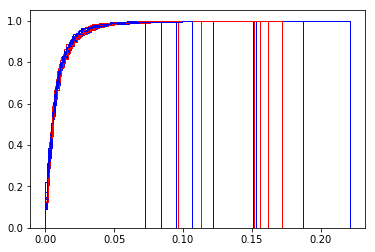

In [286]:
import itertools

ps = alldxys["_x10"][1][:15]
qs = alldata["_x10"][1][:15]
for p, q in itertools.product(ps, qs):
    _, pval = ks_2samp(np.random.choice(p, 100), np.random.choice(q, 100))
    if pval < 0.05:
        print(len(p), len(q))
        plt.hist(p, histtype="step", cumulative=True, normed=True, bins=100, color='r')
        plt.hist(q, histtype="step", cumulative=True, normed=True, bins=100, color='b')

1264 1259
Ks_2sampResult(statistic=0.065000000000000002, pvalue=0.15267889513474225)


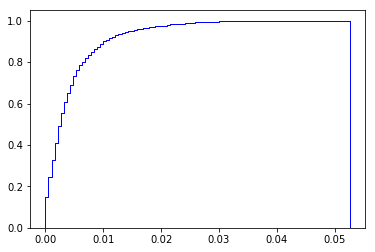

In [290]:
#print(allpis["_x1"][1][0][:10])
m = np.array([y for x in allpis["_x1"][0.1] for y in x])
p = m[m<0.06]
print("{} {}".format(len(m), len(p)))
m = np.array([y for x in allpis["_x1"][0.1] for y in x])
d = m[m<0.06]
plt.hist(d[:1000], histtype="step", cumulative=True, normed=True, bins=100, color="r")
plt.hist(p[:1000], histtype="step", cumulative=True, normed=True, bins=100, color="b")
print(ks_2samp(p[:600],d[600:1200]))
m.sort()
d.sort()

2210 2210
Anderson_ksampResult(statistic=6.9206238469566594, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.0008736936280247924)


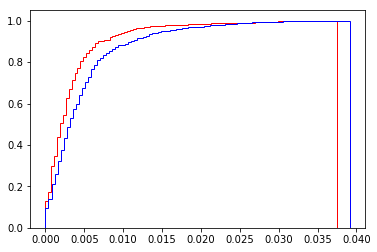

In [335]:
#print(allpis["_x1"][1][0][:10])
m = np.array([y for x in allpis["_x1"][1] for y in x])
p = m[m<0.06]
print("{} {}".format(len(m), len(p)))
m = np.array([y for x in allpis["_x10"][0.25] for y in x])
d = m[m<0.06]
plt.hist(d[:1000], histtype="step", cumulative=True, normed=True, bins=100, color="r")
plt.hist(p[:1000], histtype="step", cumulative=True, normed=True, bins=100, color="b")
print(scipy.stats.anderson_ksamp([p[:100] ,d[:100]]))
m.sort()
d.sort()

In [235]:
m[-20:]

array([ 0.02725762,  0.02757156,  0.02802401,  0.02934441,  0.02981533,
        0.0299169 ,  0.03028624,  0.03434903,  0.03530933,  0.03746999,
        0.03840259,  0.04237304,  0.04376731,  0.0465097 ,  0.11724838,
        0.13039705,  0.13818098,  0.14025854,  0.14613112,  0.15248384])